<a href="https://colab.research.google.com/github/BilalAsifB/Learning-PyTorch/blob/main/notebooks/02_pytorch_NN_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [479]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(torch.__version__)

2.9.0+cpu


In [480]:
RANDOM_SEED = 42
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [481]:
import sklearn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [482]:
n_samples = 1000
x, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=RANDOM_SEED)

In [483]:
circles = pd.DataFrame({'X1': x[:, 0],
                       'X2': x[:, 1],
                       'label': y})

In [484]:
circles[:11]

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


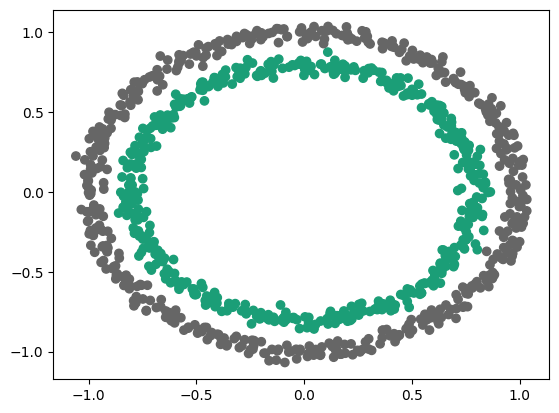

In [485]:
plt.scatter(x=circles['X1'],
            y=circles['X2'],
            c=y,
            cmap=plt.cm.Dark2_r)
plt.show()

In [486]:
x.ndim, x.shape

(2, (1000, 2))

In [487]:
y.ndim, y.shape

(1, (1000,))

In [488]:
x = torch.from_numpy(x).type(torch.float).to(DEVICE)
y = torch.from_numpy(y).type(torch.float).to(DEVICE)

x.dtype, y.dtype

(torch.float32, torch.float32)

In [489]:
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEED)

In [490]:
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [491]:
class CircleClassificationModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=X_train.shape[1],
                                 out_features=3)
        self.layer_2 = nn.Linear(in_features=3,
                                 out_features=y_train.ndim)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer_2(self.layer_1(x))

In [492]:
model = CircleClassificationModel().to(DEVICE)

In [493]:
model.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427]])),
             ('layer_1.bias', tensor([-0.3443,  0.4153,  0.6233])),
             ('layer_2.weight', tensor([[-0.4236,  0.5018,  0.1081]])),
             ('layer_2.bias', tensor([0.4266]))])

In [494]:
# Easier way to make a simple sequential model
model = nn.Sequential(
    nn.Linear(in_features=X_train.shape[1],
              out_features=3),
    nn.Linear(in_features=3,
              out_features=y_train.ndim),
).to(DEVICE)

In [495]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.0958,  0.3410],
                      [-0.0998,  0.5451],
                      [ 0.1045, -0.3301]])),
             ('0.bias', tensor([ 0.1802, -0.3258, -0.0829])),
             ('1.weight', tensor([[-0.2345,  0.3830, -0.4557]])),
             ('1.bias', tensor([-0.2662]))])

In [496]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model.parameters(),
                             lr=0.001)

In [497]:
torch.manual_seed(RANDOM_SEED)
epochs = 200

for epoch in range(epochs + 1):
    model.train()
    train_logits = model(X_train).squeeze()
    train_preds = torch.round(torch.sigmoid(train_logits))
    train_loss = loss_fn(train_logits, y_train)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)

    if epoch % 10 == 0:
        print(f'~ Epoch: {epoch}:\nTraining loss: {train_loss:.6} | Testing_loss: {test_loss:.6}')

~ Epoch: 0:
Training loss: 0.716238 | Testing_loss: 0.719557
~ Epoch: 10:
Training loss: 0.71337 | Testing_loss: 0.716761
~ Epoch: 20:
Training loss: 0.710779 | Testing_loss: 0.714275
~ Epoch: 30:
Training loss: 0.708442 | Testing_loss: 0.712063
~ Epoch: 40:
Training loss: 0.706346 | Testing_loss: 0.710084
~ Epoch: 50:
Training loss: 0.704478 | Testing_loss: 0.708312
~ Epoch: 60:
Training loss: 0.702817 | Testing_loss: 0.706723
~ Epoch: 70:
Training loss: 0.701346 | Testing_loss: 0.705296
~ Epoch: 80:
Training loss: 0.700047 | Testing_loss: 0.704013
~ Epoch: 90:
Training loss: 0.698903 | Testing_loss: 0.702857
~ Epoch: 100:
Training loss: 0.6979 | Testing_loss: 0.701816
~ Epoch: 110:
Training loss: 0.697027 | Testing_loss: 0.700879
~ Epoch: 120:
Training loss: 0.696272 | Testing_loss: 0.700039
~ Epoch: 130:
Training loss: 0.695625 | Testing_loss: 0.699288
~ Epoch: 140:
Training loss: 0.695078 | Testing_loss: 0.69862
~ Epoch: 150:
Training loss: 0.69462 | Testing_loss: 0.69803
~ Epoch: 

In [498]:
import requests
from pathlib import Path

if not Path('helper_functions.py').is_file():
    request =  requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py')
    with open('helper_functions.py', 'wb') as f:
        f.write(request.content)

In [499]:
from helper_functions import plot_predictions, plot_decision_boundary

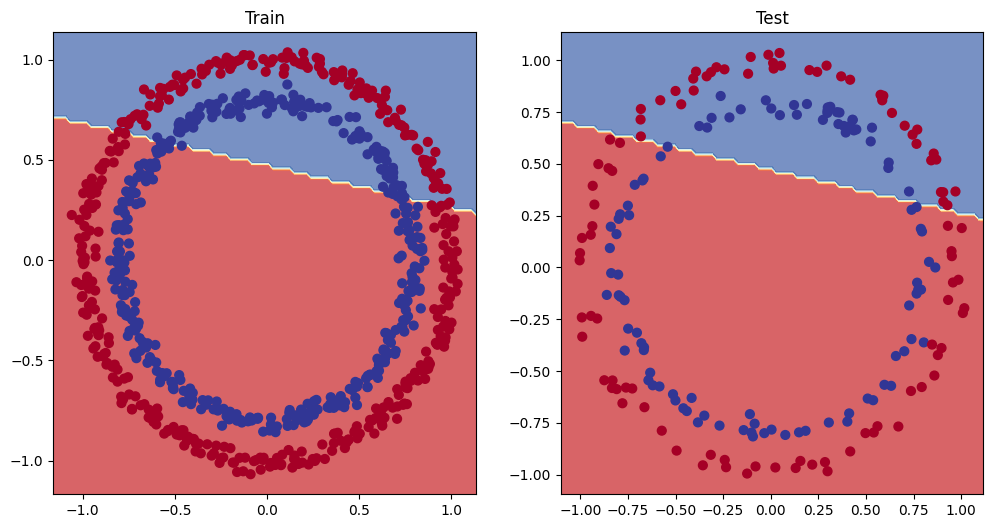

In [500]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model, X_test, y_test)

In [501]:
improved_model = nn.Sequential(
    nn.Linear(in_features=X_train.shape[1],
              out_features=16),
    nn.Linear(in_features=16,
              out_features=8),
    nn.Linear(in_features=8,
              out_features=y_train.ndim)
).to(DEVICE)

In [502]:
improved_model

Sequential(
  (0): Linear(in_features=2, out_features=16, bias=True)
  (1): Linear(in_features=16, out_features=8, bias=True)
  (2): Linear(in_features=8, out_features=1, bias=True)
)

In [503]:
def train_test_loop(X_train, X_test, y_train, y_test,
                    model, epochs=200, lr=0.001):
    torch.manual_seed(RANDOM_SEED)
    torch.cuda.manual_seed(RANDOM_SEED)

    loss_fn = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.Adam(model.parameters(),
                                 lr=lr)
    epochs=epochs

    for epoch in range(epochs + 1):
        model.train()
        train_logits = model(X_train).squeeze()
        train_preds = torch.round(torch.sigmoid(train_logits))
        train_loss = loss_fn(train_logits, y_train)
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        model.eval()
        with torch.inference_mode():
            test_logits = model(X_test).squeeze()
            test_preds = torch.round(torch.sigmoid(test_logits))
            test_loss = loss_fn(test_logits, y_test)

        if epoch % 10 == 0:
            print(f'~ Epoch: {epoch}:\nTraining loss: {train_loss:.6} | Testing_loss: {test_loss:.6}')

In [504]:
train_test_loop(X_train, X_test, y_train, y_test, improved_model, 1000)

~ Epoch: 0:
Training loss: 0.70029 | Testing_loss: 0.699194
~ Epoch: 10:
Training loss: 0.696511 | Testing_loss: 0.695745
~ Epoch: 20:
Training loss: 0.694278 | Testing_loss: 0.693881
~ Epoch: 30:
Training loss: 0.693318 | Testing_loss: 0.693331
~ Epoch: 40:
Training loss: 0.693091 | Testing_loss: 0.693588
~ Epoch: 50:
Training loss: 0.693032 | Testing_loss: 0.694076
~ Epoch: 60:
Training loss: 0.692987 | Testing_loss: 0.694514
~ Epoch: 70:
Training loss: 0.692981 | Testing_loss: 0.694782
~ Epoch: 80:
Training loss: 0.692982 | Testing_loss: 0.694844
~ Epoch: 90:
Training loss: 0.692981 | Testing_loss: 0.694785
~ Epoch: 100:
Training loss: 0.69298 | Testing_loss: 0.69471
~ Epoch: 110:
Training loss: 0.69298 | Testing_loss: 0.69467
~ Epoch: 120:
Training loss: 0.69298 | Testing_loss: 0.694664
~ Epoch: 130:
Training loss: 0.69298 | Testing_loss: 0.69467
~ Epoch: 140:
Training loss: 0.69298 | Testing_loss: 0.694677
~ Epoch: 150:
Training loss: 0.69298 | Testing_loss: 0.69468
~ Epoch: 160:


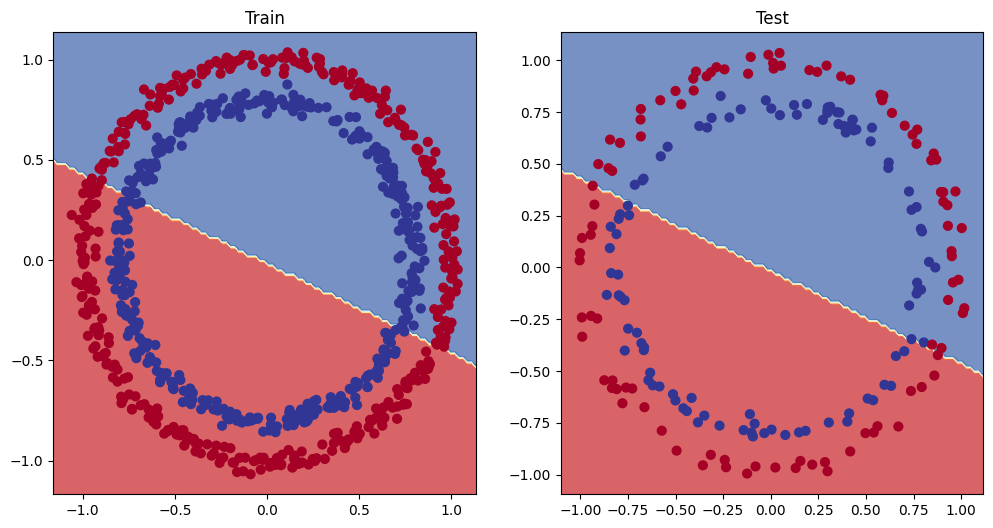

In [505]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(improved_model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(improved_model, X_test, y_test)

### Testing the model on a simpler problem

In [506]:
weight = 0.89
bias = 0.23

start = 0
end = 10
step = 0.01

X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

In [507]:
X_regression.to(DEVICE)
y_regression.to(DEVICE)

tensor([[0.2300],
        [0.2389],
        [0.2478],
        [0.2567],
        [0.2656],
        [0.2745],
        [0.2834],
        [0.2923],
        [0.3012],
        [0.3101],
        [0.3190],
        [0.3279],
        [0.3368],
        [0.3457],
        [0.3546],
        [0.3635],
        [0.3724],
        [0.3813],
        [0.3902],
        [0.3991],
        [0.4080],
        [0.4169],
        [0.4258],
        [0.4347],
        [0.4436],
        [0.4525],
        [0.4614],
        [0.4703],
        [0.4792],
        [0.4881],
        [0.4970],
        [0.5059],
        [0.5148],
        [0.5237],
        [0.5326],
        [0.5415],
        [0.5504],
        [0.5593],
        [0.5682],
        [0.5771],
        [0.5860],
        [0.5949],
        [0.6038],
        [0.6127],
        [0.6216],
        [0.6305],
        [0.6394],
        [0.6483],
        [0.6572],
        [0.6661],
        [0.6750],
        [0.6839],
        [0.6928],
        [0.7017],
        [0.7106],
        [0

In [508]:
X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(X_regression,
                                                    y_regression,
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEED)

In [509]:
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(800, 200, 800, 200)

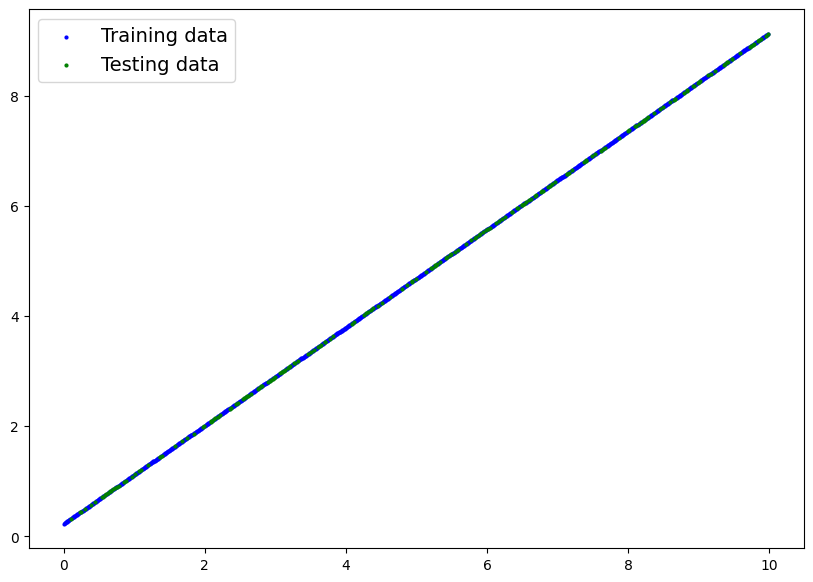

In [510]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

In [511]:
regression_model = nn.Sequential(
    nn.Linear(in_features=X_train_regression.shape[1],
              out_features=16),
    nn.Linear(in_features=16,
              out_features=8),
    nn.Linear(in_features=8,
              out_features=y_train_regression.shape[1]),
).to(DEVICE)

In [512]:
regression_model

Sequential(
  (0): Linear(in_features=1, out_features=16, bias=True)
  (1): Linear(in_features=16, out_features=8, bias=True)
  (2): Linear(in_features=8, out_features=1, bias=True)
)

In [513]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=regression_model.parameters(),
                            lr=0.001)

In [514]:
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

epochs = 200

for epoch in range(epochs + 1):
    regression_model.train()
    train_preds = regression_model(X_train_regression)
    train_loss = loss_fn(train_preds, y_train_regression)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    regression_model.eval()
    with torch.inference_mode():
        test_preds = regression_model(X_test_regression)
        test_loss = loss_fn(test_preds, y_test_regression)

    if epoch % 10 == 0:
        print(f'~ Epoch: {epoch}:\nTraining loss: {train_loss:.6} | Testing_loss: {test_loss:.6}')

~ Epoch: 0:
Training loss: 5.60546 | Testing_loss: 5.62139
~ Epoch: 10:
Training loss: 4.75424 | Testing_loss: 4.75657
~ Epoch: 20:
Training loss: 3.89328 | Testing_loss: 3.87556
~ Epoch: 30:
Training loss: 2.96018 | Testing_loss: 2.91439
~ Epoch: 40:
Training loss: 1.88586 | Testing_loss: 1.80161
~ Epoch: 50:
Training loss: 0.587434 | Testing_loss: 0.450872
~ Epoch: 60:
Training loss: 0.133962 | Testing_loss: 0.0223562
~ Epoch: 70:
Training loss: 0.114205 | Testing_loss: 0.0394178
~ Epoch: 80:
Training loss: 0.0771285 | Testing_loss: 0.074854
~ Epoch: 90:
Training loss: 0.119909 | Testing_loss: 0.0348528
~ Epoch: 100:
Training loss: 0.0735171 | Testing_loss: 0.0802705
~ Epoch: 110:
Training loss: 0.10796 | Testing_loss: 0.0475353
~ Epoch: 120:
Training loss: 0.129825 | Testing_loss: 0.0255229
~ Epoch: 130:
Training loss: 0.139676 | Testing_loss: 0.0156692
~ Epoch: 140:
Training loss: 0.0791823 | Testing_loss: 0.0772185
~ Epoch: 150:
Training loss: 0.100527 | Testing_loss: 0.0562245
~ 

In [515]:
regression_model.eval()
with torch.inference_mode():
    preds = regression_model(X_test_regression)

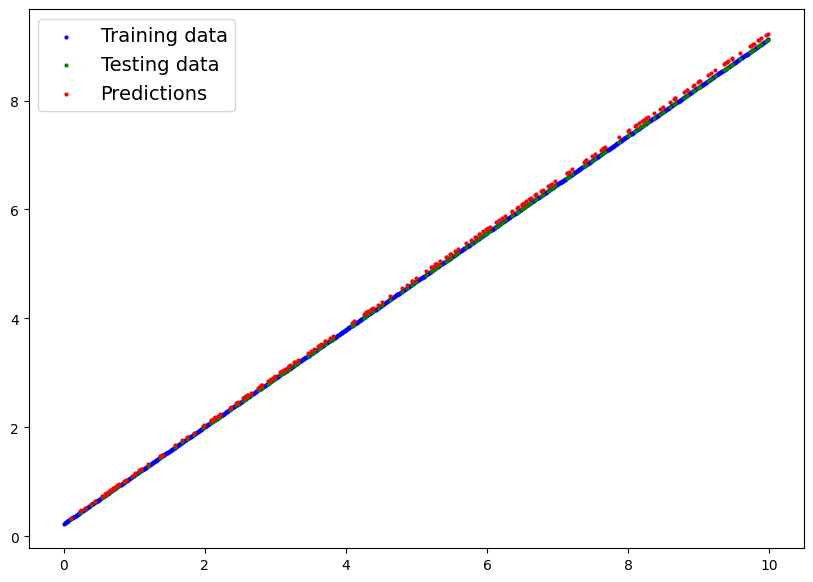

In [516]:
plot_predictions(predictions=preds,
                 train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

### Adding non-linearity to the model

In [517]:
non_linear_model = nn.Sequential(
    nn.Linear(in_features=X_train.shape[1],
              out_features=16),
    nn.ReLU(),
    nn.Linear(in_features=16,
              out_features=8),
    nn.ReLU(),
    nn.Linear(in_features=8,
              out_features=y_train.ndim)
)

In [518]:
non_linear_model

Sequential(
  (0): Linear(in_features=2, out_features=16, bias=True)
  (1): ReLU()
  (2): Linear(in_features=16, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=1, bias=True)
)

In [519]:
train_test_loop(X_train, X_test, y_train, y_test,
                model=non_linear_model, epochs=1000)

~ Epoch: 0:
Training loss: 0.701693 | Testing_loss: 0.701522
~ Epoch: 10:
Training loss: 0.698911 | Testing_loss: 0.698881
~ Epoch: 20:
Training loss: 0.696805 | Testing_loss: 0.696837
~ Epoch: 30:
Training loss: 0.694889 | Testing_loss: 0.694887
~ Epoch: 40:
Training loss: 0.693008 | Testing_loss: 0.692855
~ Epoch: 50:
Training loss: 0.691441 | Testing_loss: 0.691138
~ Epoch: 60:
Training loss: 0.689998 | Testing_loss: 0.689603
~ Epoch: 70:
Training loss: 0.688764 | Testing_loss: 0.688322
~ Epoch: 80:
Training loss: 0.68769 | Testing_loss: 0.687339
~ Epoch: 90:
Training loss: 0.686631 | Testing_loss: 0.686517
~ Epoch: 100:
Training loss: 0.685502 | Testing_loss: 0.685741
~ Epoch: 110:
Training loss: 0.684249 | Testing_loss: 0.684909
~ Epoch: 120:
Training loss: 0.682825 | Testing_loss: 0.683964
~ Epoch: 130:
Training loss: 0.681186 | Testing_loss: 0.682872
~ Epoch: 140:
Training loss: 0.679299 | Testing_loss: 0.681596
~ Epoch: 150:
Training loss: 0.677117 | Testing_loss: 0.680103
~ Ep

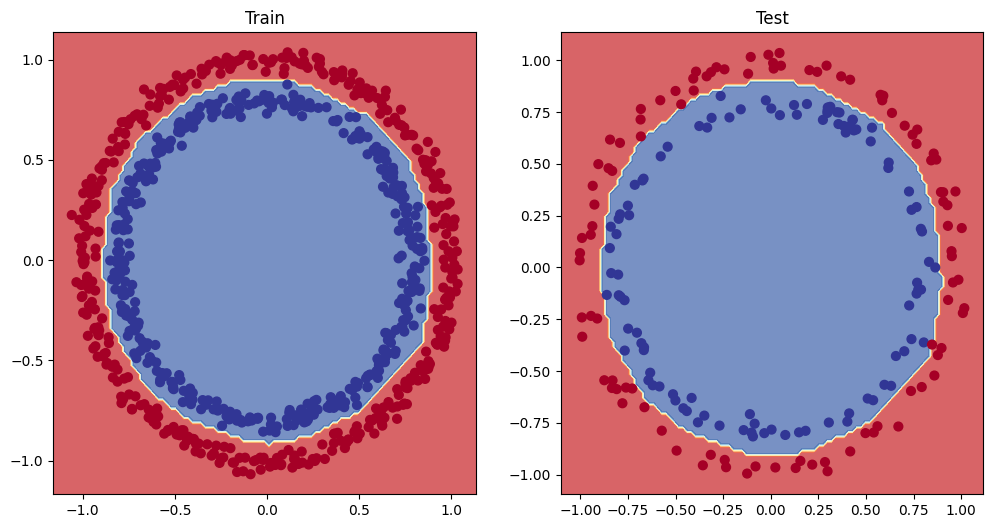

In [520]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(non_linear_model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(non_linear_model, X_test, y_test)